# Data Analysis of COVID-19 Case in East Java

## 1) Introduction

Corona Virus Disease (COVID-19) outbreak is getting worse since started in late 2019, especially in Indonesia. To get insight from this almost uncontrollable COVID-19 outbreak in Indonesia and to propose some solutions to reduce COVID-19 daily case increment, this project will discuss the outbreak control in East Java, Indonesia with data visualization and data exploration techniques. East Java is chosen in this project because it is one of provinces in Indonesia that had worst outbreak case in early period of the pandemic.

This project uses data from Goverment of Indonesia's National COVID-19 Response Acceleration Task Force (*Gugus Tugas Percepatan Penanganan COVID-19*) or now known as COVID-19 Response Task Force (*Satuan Tugas Penanganan COVID-19*) website (*https://covid19.go.id*).

**Acknowledgement: This project is conducted purely to answer my curiosity in COVID-19 case progression in East Java, Indonesia. Arguments in this project is all based from my analysis and I am not affiliated with any goverment authorities.**

## 2) Load Dataset that Contains COVID-19 Outbreak Case in East Java

In [51]:
# Request access to load the data
import requests
east_java = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json')

# Check API status if the access is granted or not
print('east_java Data status code:\n')
if east_java.status_code == 200:
    print('Data access is granted!\n')
else:
    print('Cannot access the data\n')
    
# Check API headers to find out saved metadata
print('Saved metadata in east_java data\n:')
print(east_java.headers,'\n')

east_java Data status code:

Data access is granted!

Saved metadata in east_java data
:
{'Server': 'nginx', 'Date': 'Tue, 23 Feb 2021 04:19:53 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Tue, 16 Feb 2021 09:29:51 GMT', 'ETag': 'W/"602b908f-13888"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'} 



Just as expected, the type of data that this project is dealing with is in form of JSON (JavaScript Object Notation). The requested data is also up-to-date. As can be seen on 'Last-Modified', the data updated on **16 February 2021 (15:29:51 WIB)** and the date of the request is on **17 February 2021 (00:46:11 WIB)**. After getting some information about the requested data, content of the data will be extracted.

The request is also done in **23 February 2021** to see if the data of COVID-19 pandemic in East Java is updated. But the data still recorded up to **16 February 2021**.

In [2]:
raw_data = east_java.json()

# Find out API content of East Java COVID-19 case.
print('Data of East Java COVID-19 case contents:\n')
print(raw_data.keys(),'\n')
print('Length of East Java COVID-19 case data = {}\n'.format(len(raw_data)))
print('data Dictionary key in raw_data dictionary\n')
print(raw_data['data'].keys())

Data of East Java COVID-19 case contents:

dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data']) 

Length of East Java COVID-19 case data = 13

data Dictionary key in raw_data dictionary

dict_keys(['last_update', 'kasus', 'sembuh', 'meninggal', 'perawatan'])


The output of **raw_data** is in form of dictionary that has 13 keys. **raw_data** dictionary is not shown here because value of *list_perkembangan* and *data* is too much to be shown. Before explore the data further, description of the dictionary data keys is needed to make the data more easy to read for general readers:

1) *last_date*: Information about last update of the data.

2) *provinsi*: This gives information about which province is this data came from.

3) *kasus_total*: Total COVID-19 cases since the first case detected in the specified province.

4) *kasus_tanpa_tgl*: Total COVID-19 confirmed cases that have no information when those were happened.

5) *kasus_dengan_tgl*: Total COVID-19 confirmed cases that have date of when the infection happened.

6) *meninggal_persen*: Death rate percentage due to complications caused by COVID-19.

7) *meninggal_tanpa_tgl*: Total COVID-19 mortality without date record.

8) *meninggal_dengan_tgl*: Total COVID-19 mortality with date record.

9) *sembuh_persen*: Recovery rate percentage from COVID-19.

10) *sembuh_tanpa_tgl*: Total COVID-19 patients that recovered without specified date record.

11) *sembuh_dengan_tgl*: Total COVID-19 patients that recovered with specified date record.

12) *list_perkembangan*: List of data that contains COVID-19 case progress day by day.

13) *data*: Additional data of COVID-19 outbreak in East Java.

In [3]:
# Show the total case per today
print('COVID-19 total case in East Java per {} = {}\n'.format(raw_data['last_date'], raw_data['kasus_total']))
print('Patients recovered from COVID-19 per {} = {}\n'.format(raw_data['last_date'], 
                                                              raw_data['sembuh_tanpa_tgl'] + raw_data['sembuh_dengan_tgl']))
print('Recovery percentage from COVID-19 in East Java= {0:.3f}%\n'.format(raw_data['sembuh_persen']))
print('Deaths from COVID-19 per {} = {}\n'.format(raw_data['last_date'], 
                                                  raw_data['meninggal_tanpa_tgl'] + raw_data['meninggal_dengan_tgl']))
print('Death percentage from COVID_19 in East Java = {0:.3f}%'.format(raw_data['meninggal_persen']))

COVID-19 total case in East Java per 2021-02-15 = 122807

Patients recovered from COVID-19 per 2021-02-15 = 104234

Recovery percentage from COVID-19 in East Java= 84.876%

Deaths from COVID-19 per 2021-02-15 = 8197

Death percentage from COVID_19 in East Java = 6.675%


There are some interesting points to observe, which are the recovery percentage and death percentage. To analyse this data and try to find out if the disease control is considered good or not, those values will be compared to COVID-19 case in Indonesia as a whole. data from *https://data.covid19.go.id/public/api/update.json* will be used to analyse COVID-19 case progression in East Java and compare it with the nationwide case.

In [4]:
# Request access to nationwide COVID-19 case data
indo = requests.get('https://data.covid19.go.id/public/api/update.json')
if indo.status_code == 200:
    print('OK\n')
    print(indo.headers,'\n')
else:
    print('Cannot access data')

# Find out what data keys are contained in the data
indo_raw_data = indo.json()
print('Length of Nationwide COVID-19 cases data = {}\n'.format(len(indo_raw_data)))
print(indo_raw_data.keys(),'\n')
print('Data keys in nationwide raw data update: {}\n'.format(indo_raw_data['update'].keys()))
print('Data keys in nationwide raw data: {}\n'.format(indo_raw_data['data'].keys()))
print('Data keys in nationwide raw data case addition: {}\n'.format(indo_raw_data['update']['penambahan'].keys()))
print('Data keys in nationwide raw data total case: {}\n'.format(indo_raw_data['update']['total'].keys()))

OK

{'Server': 'nginx', 'Date': 'Mon, 22 Feb 2021 18:47:46 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Mon, 22 Feb 2021 18:43:37 GMT', 'ETag': 'W/"6033fb59-21966"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'} 

Length of Nationwide COVID-19 cases data = 2

dict_keys(['data', 'update']) 

Data keys in nationwide raw data update: dict_keys(['penambahan', 'harian', 'total'])

Data keys in nationwide raw data: dict_keys(['id', 'jumlah_odp', 'jumlah_pdp', 'total_spesimen', 'total_spesimen_negatif'])

Data keys in nationwide raw data case addition: dict_keys(['jumlah_positif', 'jumlah_meninggal', 'jumlah_sembuh', 'jumlah_dirawat', 'tanggal', 'created'])

Data keys in nationwide raw data total case: dict_keys(['jumlah_

In [5]:
print('COVID-19 total case in Indonesia per {}: {}\n'.format(indo_raw_data['update']['penambahan']['tanggal'], 
                                                           indo_raw_data['update']['total']['jumlah_positif']))
print('Total patients recovered from COVID-19 in Indonesia per {}: {}\n'.format(indo_raw_data['update']['penambahan']['tanggal'],
                                                                             indo_raw_data['update']['total']['jumlah_sembuh']))
print('Total deaths caused by COVID-19 in Indonesia per {}: {}'.format(indo_raw_data['update']['penambahan']['tanggal'],
                                                                      indo_raw_data['update']['total']['jumlah_meninggal']))

COVID-19 total case in Indonesia per 2021-02-22: 1288833

Total patients recovered from COVID-19 in Indonesia per 2021-02-22: 1096994

Total deaths caused by COVID-19 in Indonesia per 2021-02-22: 34691


Since there are no recovery percentage and mortality percentage data, those can be calculated following the formula:

$$ recovery = \frac{recovered}{total} * 100\% $$

$$ mortality = \frac{deaths}{total} * 100\% $$

In [6]:
recovered = indo_raw_data['update']['total']['jumlah_sembuh']
deaths = indo_raw_data['update']['total']['jumlah_meninggal']
total_case = indo_raw_data['update']['total']['jumlah_positif']

def rate(x):
    percentage = (x/total_case)*100
    return float(percentage)

print('Recovery percentage from COVID-19 nationwide = {0:.3f}%\n'.format(rate(recovered)))
print('Death percentage from COVID-19 nationwide = {0:.3f}%'.format(rate(deaths)))

Recovery percentage from COVID-19 nationwide = 85.115%

Death percentage from COVID-19 nationwide = 2.692%


Recovery percentage in East Java is slightly better than nationwide recovery percentage, which indicates East Java has good COVID-19 patients treatment. However the death percentage in East Java is far higher compared to nationwide death percentage, the reason behind this will be discovered later.

## 3) Visualizing COVID-19 Outbreak in Indonesia

Visualizing the outbreak in Indonesia is important to compare the data with East Java COVID-19 outbreak data, trying to get clue if the case progression is getting better or worse, both in Indonesia and in East Java. Start with load new libraries and convert the raw data into pandas dataframe.

In [7]:
# Convert the raw data into dataframe
import pandas as pd
import numpy as np

indo_daily = pd.DataFrame(indo_raw_data['update']['harian'])
print('indo_daily dataframe information\n')
print(indo_daily.info(),'\n')
print('Dataframe preview\n')
print(indo_daily.head(),'\n')

indo_daily dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   key_as_string         358 non-null    object
 1   key                   358 non-null    int64 
 2   doc_count             358 non-null    int64 
 3   jumlah_meninggal      358 non-null    object
 4   jumlah_sembuh         358 non-null    object
 5   jumlah_positif        358 non-null    object
 6   jumlah_dirawat        358 non-null    object
 7   jumlah_positif_kum    358 non-null    object
 8   jumlah_sembuh_kum     358 non-null    object
 9   jumlah_meninggal_kum  358 non-null    object
 10  jumlah_dirawat_kum    358 non-null    object
dtypes: int64(2), object(9)
memory usage: 30.9+ KB
None 

Dataframe preview

              key_as_string            key  doc_count jumlah_meninggal  \
0  2020-03-02T00:00:00.000Z  1583107200000          1     {'

At this point, there are 2 problems in the dataframe to make data visualization possible:

1) *key* Column that has information about the date is not in pandas date and time format.

2) Columns from *jumlah_meninggal* to *jumlah_dirawat_kum* values are not integer, but in form of data dictionary with string 'value' as dictionary key.

These problem has to be solved, starts with converting these columns with data dictionary to integer. This has to be done to make necessary calculations find some insights from the analysis.

In [8]:
# Get the values on each row that contains data dictionary
raw_columns = ['jumlah_meninggal','jumlah_sembuh','jumlah_positif','jumlah_dirawat',
              'jumlah_positif_kum','jumlah_sembuh_kum','jumlah_meninggal_kum','jumlah_dirawat_kum']
for i in raw_columns:
    indo_daily[i] = indo_daily[i].apply(lambda x: x['value'])

print('indo_daily dataframe information after reformat\n')
print(indo_daily.info(),'\n')
print('Dataframe preview after reformat\n')
print(indo_daily.head())

indo_daily dataframe information after reformat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   key_as_string         358 non-null    object
 1   key                   358 non-null    int64 
 2   doc_count             358 non-null    int64 
 3   jumlah_meninggal      358 non-null    int64 
 4   jumlah_sembuh         358 non-null    int64 
 5   jumlah_positif        358 non-null    int64 
 6   jumlah_dirawat        358 non-null    int64 
 7   jumlah_positif_kum    358 non-null    int64 
 8   jumlah_sembuh_kum     358 non-null    int64 
 9   jumlah_meninggal_kum  358 non-null    int64 
 10  jumlah_dirawat_kum    358 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 30.9+ KB
None 

Dataframe preview after reformat

              key_as_string            key  doc_count  jumlah_meninggal  \
0  2020-03-02T00:00:00.000Z 

Columns that contained data dictionary has already changed to integer data, the data type of these columns changed from object to integer (written as int64). Next, **'key'** columns will be renamed to **'tanggal'** and make the column matches with pandas date and time format.

In [9]:
# Rename 'key' columns with 'tanggal'
indo_daily = indo_daily.rename(columns = {'key':'tanggal', 'key_as_string':'waktu_input'})

# Change date format to pandas date and time format
indo_daily['tanggal'] = pd.to_datetime(indo_daily['tanggal'] *1e6)
indo_daily['waktu_input'] = pd.to_datetime(indo_daily['waktu_input'], format = '%Y-%m-%d %H:%M:%S')
indo_daily['waktu_input'] = indo_daily['waktu_input'].apply(lambda x: x.time())
print(indo_daily[['tanggal','waktu_input']].tail())

       tanggal waktu_input
353 2021-02-18    00:00:00
354 2021-02-19    00:00:00
355 2021-02-20    00:00:00
356 2021-02-21    00:00:00
357 2021-02-22    00:00:00


In [10]:
print(indo_daily.tail())

    waktu_input    tanggal  doc_count  jumlah_meninggal  jumlah_sembuh  \
353    00:00:00 2021-02-18          1               181          10546   
354    00:00:00 2021-02-19          1               183          10783   
355    00:00:00 2021-02-20          1               164           9835   
356    00:00:00 2021-02-21          1               173           8236   
357    00:00:00 2021-02-22          1               202           9918   

     jumlah_positif  jumlah_dirawat  jumlah_positif_kum  jumlah_sembuh_kum  \
353            9039           -1688             1252685            1058222   
354           10614            -352             1263299            1069005   
355            8054           -1945             1271353            1078840   
356            7300           -1109             1278653            1087076   
357           10180              60             1288833            1096994   

     jumlah_meninggal_kum  jumlah_dirawat_kum  
353                 33969             

For now, the dataframe is ready to be visualized. The detail of this dataframe will be described below:

1) *waktu_input*: Time of when the data is inputted on each day

2) *tanggal*: The date when reported data is inputted

3) *doc_count*: Document count on every data input

4) *jumlah_meninggal*: Total death report of COVID-19 patients due to complication on each day

5) *jumlah_sembuh*: Total patients that recovered from COVID-19 on each day

6) *jumlah_positif*: Total of reported COVID-19 positive case on each day

7) *jumlah_dirawat*: Total patients that are recorded still or no longer in treatment

8) *jumlah_positif_kum*: Accumulation of reported COVID-19 positive case

9) *jumlah_sembuh_kum*: Accumulation of the recovered patients

10) *jumlah_meninggal_kum*: Accumulation of the deaths reports of COVID-19 patients

11) *jumlah_dirawat_kum*: Accumulation of patients that are still in treatment

Notice that in *jumlah_dirawat* column there are some negative values, these values indicate there are patients that already have recovered from COVID-19 and they are no longer in intensive treatment. Those values certainly will reduce the cumulative reported patients that are still in intensive treatment, which is a good sign.

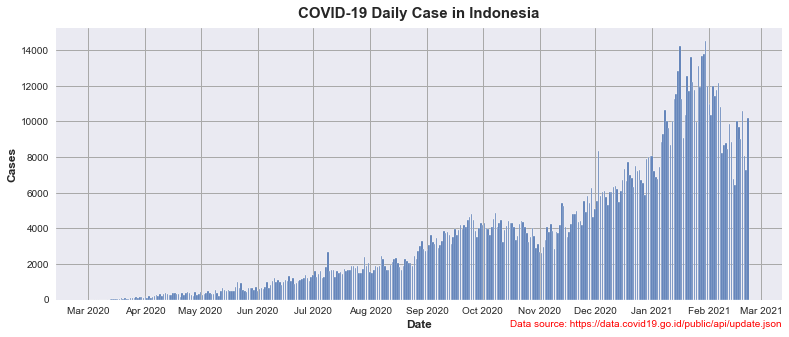

In [11]:
# COVID-19 daily case progress since first 2 confirmed case in 2 March 2020
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
sns.set_style(style = 'darkgrid')
plt.style.use('seaborn')

fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (13,5))
axs.bar(data = indo_daily, x = 'tanggal', height = 'jumlah_positif')
axs.set_title('COVID-19 Daily Case in Indonesia', fontsize = 15, weight = 'bold', pad = 10)
axs.set_xlabel('Date', fontsize = 12, weight = 'bold')
axs.set_ylabel('Cases', fontsize = 12, weight = 'bold')
axs.xaxis.set_major_locator(mdates.MonthLocator())
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs.text(1, -0.1, 'Data source: https://data.covid19.go.id/public/api/update.json', color = 'red',
        ha = 'right', transform = axs.transAxes)
plt.grid(axis = 'both', color = 'darkgray')
plt.savefig('National_COVID_Daily_Case.png')
plt.show()

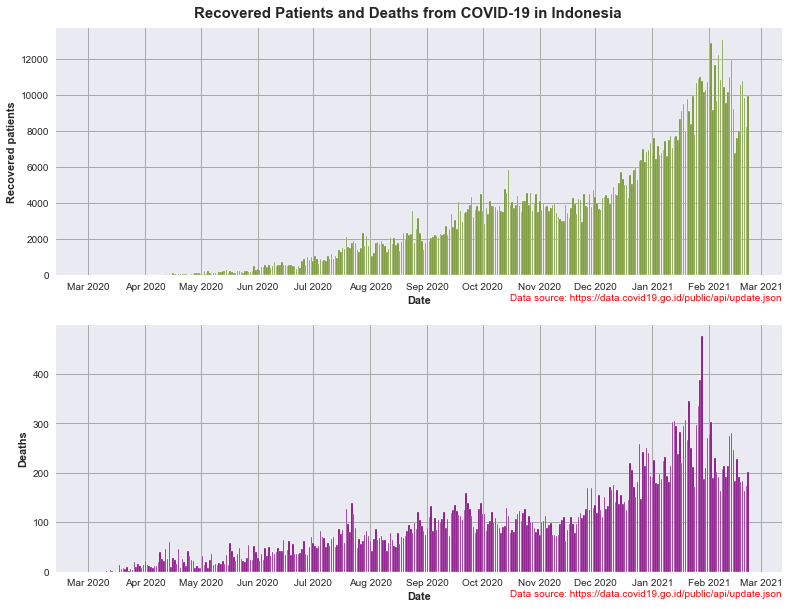

In [12]:
# Patients recovered from COVID-19 and Death report from COVID-19
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (13, 10))
fig.suptitle('Recovered Patients and Deaths from COVID-19 in Indonesia', fontsize = 15, y = 0.91,
            ha = 'center', fontweight = 'bold')
variables = ['jumlah_sembuh', 'jumlah_meninggal']
colours = ['olivedrab', 'purple']
for order, var, col in zip(range(2), variables, colours):
    axs[order].bar(data = indo_daily, x = 'tanggal', height = var, color = col)
    axs[order].set_xlabel('Date', fontsize = 11, weight = 'bold')
    axs[order].xaxis.set_major_locator(mdates.MonthLocator())
    axs[order].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    axs[order].text(1, -0.1, 'Data source: https://data.covid19.go.id/public/api/update.json', color = 'red',
                   ha = 'right', transform = axs[order].transAxes)
    axs[order].grid(axis = 'both', color = 'darkgray')
axs[0].set_ylabel('Recovered patients', fontsize = 11, weight = 'bold')
axs[1].set_ylabel('Deaths', fontsize = 11, weight = 'bold')
plt.savefig('National_recovered_deaths_cases.png')
plt.show()

In [13]:
# Trend of COVID-19 case in Indonesia
indo_daily_trend = indo_daily[['tanggal','jumlah_dirawat']]
indo_daily_trend = indo_daily_trend.rename(columns = {'jumlah_dirawat_kum':'kasus_aktif_kum'})

In [14]:
print(indo_daily_trend.tail())

       tanggal  jumlah_dirawat
353 2021-02-18           -1688
354 2021-02-19            -352
355 2021-02-20           -1945
356 2021-02-21           -1109
357 2021-02-22              60


       tanggal  jumlah_dirawat  kasus_aktif_kum
353 2021-02-18           -1688           160494
354 2021-02-19            -352           160142
355 2021-02-20           -1945           158197
356 2021-02-21           -1109           157088
357 2021-02-22              60           157148


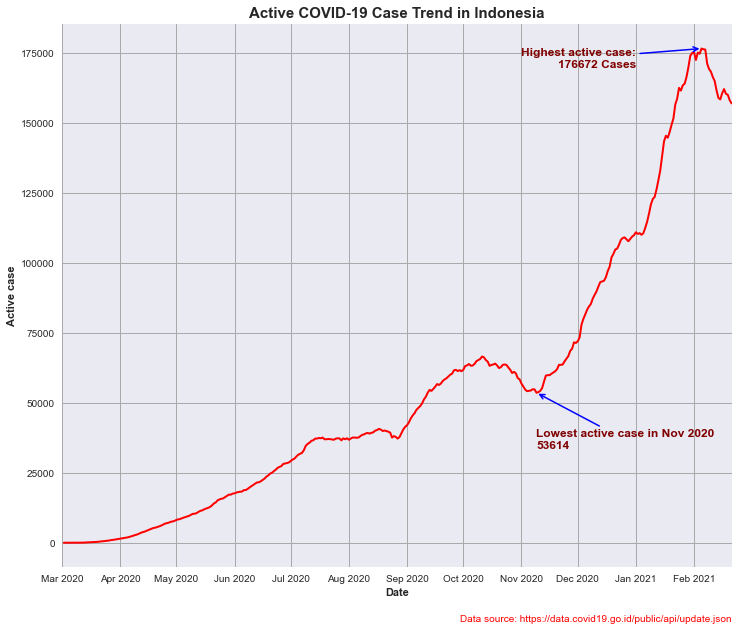

In [15]:
indo_daily_trend['kasus_aktif_kum'] = indo_daily_trend['jumlah_dirawat'].cumsum()
print(indo_daily_trend.tail())
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (12,10))
axs.plot('tanggal', 'kasus_aktif_kum', data = indo_daily_trend, linewidth = 2, color = 'red')
axs.set_xlim('2020-03-01','2021-02-21')
axs.set_title('Active COVID-19 Case Trend in Indonesia', fontsize = 15, weight = 'bold')
axs.xaxis.set_major_locator(mdates.MonthLocator())
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs.set_xlabel('Date', fontsize = 11, weight = 'bold')
axs.set_ylabel('Active case', fontsize = 11, weight = 'bold')
axs.annotate('Highest active case:\n{} Cases'.format(indo_daily_trend['kasus_aktif_kum'].max()), 
             xy = ('2021-02-05', indo_daily_trend['kasus_aktif_kum'].max()), 
             xytext = ('2021-01-01', 170000), ha = 'right', color = 'maroon',
             arrowprops = {'arrowstyle':'->', 'color': 'blue', 'linewidth':1.5},
            fontsize = 12, weight = 'bold')
axs.grid(axis = 'both', color = 'darkgray')
axs.text(1, -0.1, 'Data source: https://data.covid19.go.id/public/api/update.json', color = 'red', 
         transform = axs.transAxes, ha = 'right')

# Focus on Nov 2020 to Feb 2021
ranging = indo_daily_trend.loc[indo_daily_trend['tanggal'] >= '2020-11-01']
axs.annotate('Lowest active case in Nov 2020\n{}'.format(ranging['kasus_aktif_kum'].min()), 
             xy = (ranging['tanggal'].loc[ranging['kasus_aktif_kum']==ranging['kasus_aktif_kum'].min()], 
                   ranging['kasus_aktif_kum'].min()),
            xytext = (ranging['tanggal'].loc[ranging['kasus_aktif_kum']==ranging['kasus_aktif_kum'].min()], 
                      ranging['kasus_aktif_kum'].min()-20000),
            ha = 'left', fontsize = 12, weight = 'bold', color = 'maroon',
            arrowprops = {'arrowstyle':'->', 'linewidth': 1.5, 'color':'blue'})
plt.savefig('National_active_case.png')
plt.show()

In [16]:
# Positivity rate calculated from speciments
total_speciment = indo_raw_data['data']['total_spesimen']
negative_speciment = indo_raw_data['data']['total_spesimen_negatif']
positive_speciment = total_speciment - negative_speciment

positive_rate = float((positive_speciment/total_speciment) * 100)
print('COVID-19 positivity rate in indonesia = {0:.3f}%\n'.format(positive_rate))

print('Locate the highest daily confirmed case from indo_daily\n')
print(indo_daily[['tanggal','jumlah_positif']].loc[indo_daily['jumlah_positif'] == indo_daily['jumlah_positif'].max()],'\n')

print('Locate the highest recorded active case\n')
print(indo_daily_trend[['tanggal','kasus_aktif_kum']].loc[indo_daily_trend['kasus_aktif_kum'] == 
                                                          indo_daily_trend['kasus_aktif_kum'].max()],'\n')

print('Locate the lowest recorded active case from Nov 2020\n')
print(ranging[['tanggal','kasus_aktif_kum']].loc[ranging['kasus_aktif_kum']==ranging['kasus_aktif_kum'].min()])

COVID-19 positivity rate in indonesia = 45.815%

Locate the highest daily confirmed case from indo_daily

       tanggal  jumlah_positif
334 2021-01-30           14518 

Locate the highest recorded active case

       tanggal  kasus_aktif_kum
340 2021-02-05           176672 

Locate the lowest recorded active case from Nov 2020

       tanggal  kasus_aktif_kum
252 2020-11-09            53614


As can be seen in daily COVID-19 case chart and curve of COVID-19 active case trend, the active case started increasing significantly from 9 November 2020 to 5 February 2021, which indicates the disease was getting out of control. There were no travel restriction during holiday season in November to December 2020, this would cause the virus spreads faster and resulted in significant reported COVID-19 active case increment. The same pattern also occurs on reported daily case of COVID-19.

World Health Organization (WHO) has set a threshold on positivity rate. Positivity rate of countries or regions in the country has to be lower than or equal to 5% as a criteria to see if COVID-19 pandemic in the country or region of the country is can be controlled. In this project, positivity rate is calculated following this formula:

$$ P.R. = \frac{total\,positive\,speciment}{total\,speciment}*100\% $$

Based on the data and the calculation, positivity rate of Indonesia is 45.891%. In other word, the virus spreads easily from person to person and the pandemic is considered still out of control. One main cause of high positivity rate is no travel restriction during holiday season, the goverment should establish strict travel restriction as an effort to slow down the positivity rate, especially during holiday season due where most people in Indonesia are gone for vacation to another province.

## 4) Visualizing COVID-19 Case In East Java

In [17]:
# Convert the raw data of East Java COVID-19 case progress data to pandas dataframe
east_java_daily = pd.DataFrame(raw_data['list_perkembangan'])

In [18]:
# Preview the data
print(east_java_daily.head())

         tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1584489600000      2          0       0                   2   
1  1584576000000      0          0       1                  -1   
2  1584662400000      0          0       0                   0   
3  1584748800000      0          0       0                   0   
4  1584835200000      0          0       0                   0   

   AKUMULASI_KASUS  AKUMULASI_SEMBUH  AKUMULASI_MENINGGAL  \
0                2                 0                    0   
1                2                 1                    0   
2                2                 1                    0   
3                2                 1                    0   
4                2                 1                    0   

   AKUMULASI_DIRAWAT_OR_ISOLASI  
0                             2  
1                             1  
2                             1  
3                             1  
4                             1  


Date format problem also occurs in this dataframe. Date in column *tanggal* has to be changed into pandas date and time format. And as can be seen in the dataframe, name of columns are in capitals. These columns will be in lower case, this has to be done to make data analysis easier.

In [19]:
# Convert date column data type to pandas format of date and time
east_java_daily['tanggal'] = pd.to_datetime(east_java_daily['tanggal']*1e6)
print('Checking the dataframe data types\n')
print(east_java_daily.info(),'\n')
print('east_java_daily Dataframe preview\n')
print(east_java_daily.tail())

Checking the dataframe data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tanggal                       335 non-null    datetime64[ns]
 1   KASUS                         335 non-null    int64         
 2   MENINGGAL                     335 non-null    int64         
 3   SEMBUH                        335 non-null    int64         
 4   DIRAWAT_OR_ISOLASI            335 non-null    int64         
 5   AKUMULASI_KASUS               335 non-null    int64         
 6   AKUMULASI_SEMBUH              335 non-null    int64         
 7   AKUMULASI_MENINGGAL           335 non-null    int64         
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  335 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 23.7 KB
None 

east_java_daily Dataframe preview

       tanggal  KASUS  MENINGGAL  S

In [20]:
# Rename 'DIRAWAT_OR_ISOLASI' and 'AKUMULASI_DIRAWAT_OR_ISOLASI' columns to 'KASUS_AKTIF' and 'AKUMULASI_KASUS_AKTIF'
import string
east_java_daily = east_java_daily.rename(columns = {'DIRAWAT_OR_ISOLASI':'KASUS_AKTIF',
                                                   'AKUMULASI_DIRAWAT_OR_ISOLASI':'AKUMULASI_KASUS_AKTIF',
                                                   'KASUS':'POSITIF', 
                                                    'AKUMULASI_KASUS':'AKUMULASI_POSITIF'}).rename(columns = str.lower)

In [21]:
print(east_java_daily.head())

     tanggal  positif  meninggal  sembuh  kasus_aktif  akumulasi_positif  \
0 2020-03-18        2          0       0            2                  2   
1 2020-03-19        0          0       1           -1                  2   
2 2020-03-20        0          0       0            0                  2   
3 2020-03-21        0          0       0            0                  2   
4 2020-03-22        0          0       0            0                  2   

   akumulasi_sembuh  akumulasi_meninggal  akumulasi_kasus_aktif  
0                 0                    0                      2  
1                 1                    0                      1  
2                 1                    0                      1  
3                 1                    0                      1  
4                 1                    0                      1  


After cleaning the dataframe. There are some new columns that has same meaning to **indo_daily** dataframe columns:

1) tanggal: Recorded date (same like tanggal in **indo_daily** dataframe)

2) positif: Recorded daily positive cases (same like jumlah_positif in **indo_daily** dataframe)

3) meninggal: Recorded deaths from COVID-19 (same like jumlah_meninggal in **indo_daily** dataframe)

4) sembuh: Recovered patients from COVID-19 (same like jumlah_sembuh in **indo_daily** dataframe)

5) kasus_aktif: Recorded cases that are still active (same like jumlah_dirawat in **indo_daily** dataframe)

6) akumulasi_positif: Accumulated positive cases (same like jumlah_positif_kum in **indo_daily** dataframe)

7) akumulasi_sembuh: Accumulated recovered patients (same like jumlah_sembuh_kum in **indo_daily** dataframe)

8) akumulasi_meninggal: Accumulated deaths (same like jumlah_meninggal_kum in **indo_daily** dataframe)

9) akumulasi_kasus_aktif: Accumulated active cases (same like jumlah_dirawat_kum in **indo_daily** dataframe)

From this similarities, column *tanggal* in both dataframe can be used to analyse the death rate by mergeing **east_java_daily** dataframe with **indo_daily** dataframe.

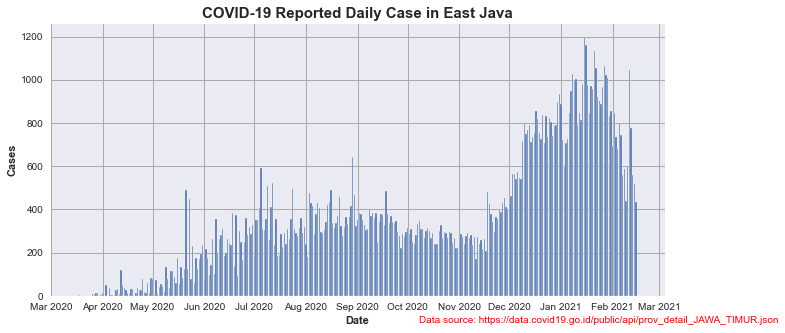

In [22]:
# Visualizing COVID-19 daily case in East Java
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (11,5))
axs.bar(data = east_java_daily, x = 'tanggal', height = 'positif')
axs.set_title('COVID-19 Reported Daily Case in East Java', fontsize = 15, weight = 'bold')
axs.set_xlabel('Date', fontsize = 11, weight = 'bold')
axs.set_ylabel('Cases', fontsize = 11, weight = 'bold')
axs.xaxis.set_major_locator(mdates.MonthLocator())
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs.text(0.6, -0.1, 'Data source: https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json',
        transform = axs.transAxes, color = 'red', ha = 'left')
plt.grid(axis = 'both', color = 'darkgray')
plt.savefig('East_Java_COVID_Daily_Case.png')
plt.show()

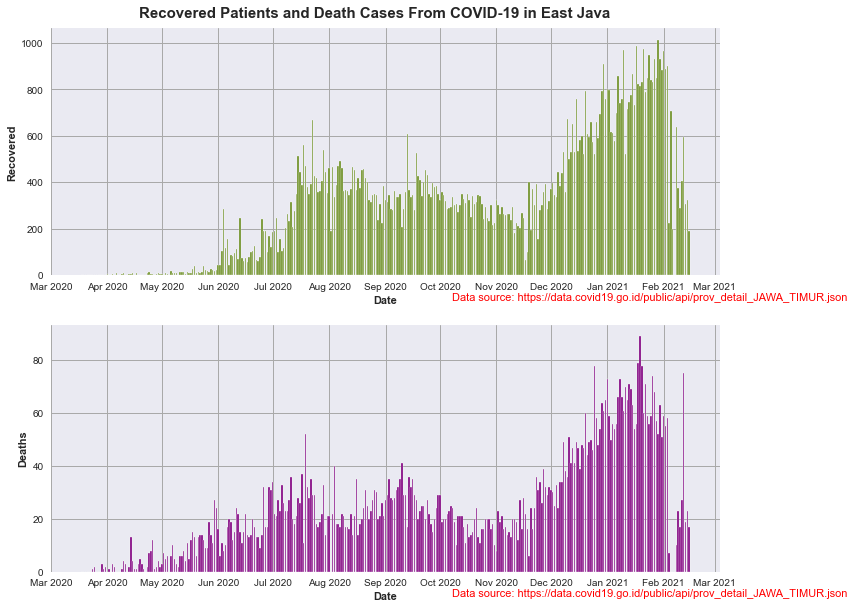

In [23]:
# Visualizing recovered and deaths cases from COVID-19 in East Java
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (12,10))
fig.suptitle('Recovered Patients and Death Cases From COVID-19 in East Java', fontsize = 15, fontweight = 'bold',
            y = 0.91, ha = 'center')
EJ_cols = ['sembuh','meninggal']
color_set = ['olivedrab','purple']
for i, ejc, cs in zip(range(2), EJ_cols, color_set):
    axs[i].bar(data = east_java_daily, x = 'tanggal', height = ejc, color = cs)
    axs[i].set_xlabel('Date', fontsize = 11, weight = 'bold')
    axs[i].xaxis.set_major_locator(mdates.MonthLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    axs[i].text(0.6, -0.1, 'Data source: https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json',
               fontsize = 11, color = 'red', transform = axs[i].transAxes, ha = 'left')
    axs[i].grid(axis = 'both', color = 'darkgray')
for i, ann in zip(range(2), ['Recovered', 'Deaths']):
    axs[i].set_ylabel('{}'.format(ann), fontsize = 11, weight = 'bold')
plt.savefig('East_Java_recovered_death_cases.png')
plt.show()

       tanggal  akumulasi_kasus_aktif
116 2020-07-12                   8907


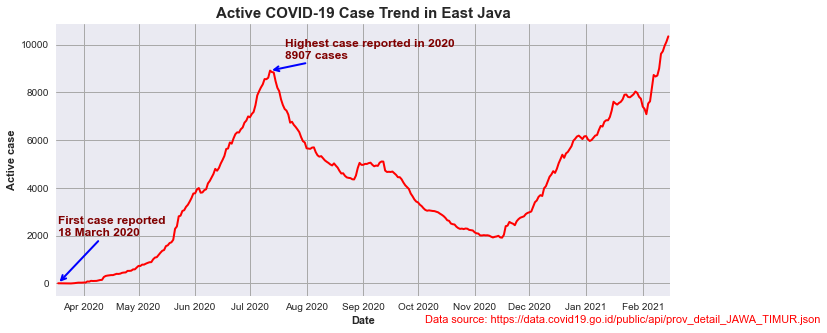

In [24]:
# Active COVID-19 case trend in East Java
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (11,5))
axs.plot('tanggal', 'akumulasi_kasus_aktif', data = east_java_daily, color = 'red', linewidth = 2)
axs.set_xlim('2020-03-17','2021-02-16')
axs.set_title('Active COVID-19 Case Trend in East Java', fontsize = 15, weight = 'bold')
axs.set_xlabel('Date', fontsize = 11, weight = 'bold')
axs.set_ylabel('Active case', fontsize = 11, weight = 'bold')
axs.xaxis.set_major_locator(mdates.MonthLocator())
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs.text(0.6, -0.1, 'Data source: https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json',
        fontsize = 11, color = 'red', ha = 'left', transform = axs.transAxes)
axs.grid(axis = 'both', color = 'darkgray')
axs.annotate('First case reported\n18 March 2020',
            xy = ('2020-03-18',east_java_daily['kasus_aktif'].loc[east_java_daily['tanggal']=='2020-03-18']),
            xytext = ('2020-03-18',east_java_daily['kasus_aktif'].loc[east_java_daily['tanggal']=='2020-03-18'] + 2000),
            arrowprops = {'arrowstyle':'->', 'linewidth':2, 'color':'blue'}, color = 'maroon', weight = 'bold',
            fontsize=12)

# Highest active case in 2020 and locate it in the graph
only_2020 = east_java_daily[['tanggal','akumulasi_kasus_aktif']].loc[east_java_daily['tanggal'] < '2021-01-01']
print(only_2020.loc[only_2020['akumulasi_kasus_aktif'] == only_2020['akumulasi_kasus_aktif'].max()])

axs.annotate('Highest case reported in 2020\n{} cases'.format(only_2020['akumulasi_kasus_aktif'].max()),
            xy = ('2020-07-12',only_2020['akumulasi_kasus_aktif'].max()),
            xytext = ('2020-07-20',only_2020['akumulasi_kasus_aktif'].max()+500),
            transform = axs.transAxes, ha = 'left', color = 'maroon', fontsize = 12, weight = 'bold',
            arrowprops = {'arrowstyle':'->', 'linewidth':2, 'color':'blue'})
plt.savefig('East_Java_active_case.png')
plt.show()

From the graphs, reported first case of COVID-19 in East Java was 16 days after the first reported case in Indonesia (East Java was on 18 March 2020 and Indonesia was on 2 March 2020). But, what differs between active case in East Java and Indonesia are in East Java the active case increase significantly and peaked on 12 July 2020 with total 8907 cases, the highest recorded active case in 2020. Same pattern occured in mid November 2020 to February 2021, reported active significantly increased during holiday season at the end of year 2020.

In 24 April 2020, there were Ramadhan and Eid al-Fitr this can be considered as main factors of active case increase in East Java. It is safe to say that people mobility in East Java was high during Ramadhan and Eid al-Fitr, this argument can be seen in daily case graph, where reported daily case has no sign of decreasing from April 2020 to July 2020.

To see the quality of disease control in East Java, one parameter that being used in analysis is weekly active case observation. Accumulated active case in every week will be calculated and if accumulated active case in that week is lower than last week, than there is either recovered patients or deaths reported from last week.

In [25]:
# Get insight if the disease control is better than last week in 2020 and 2021
east_java_2020 = east_java_daily.drop(columns = [x for x in east_java_daily.columns if x.startswith('akumulasi')]).loc[
    east_java_daily['tanggal'] <= '2021-01-03'
]
east_java_2021 = east_java_daily.drop(columns = [x for x in east_java_daily.columns if x.startswith('akumulasi')]).loc[
    east_java_daily['tanggal'] > '2021-01-03'
]
print('COVID-19 Case in East Java (2020)\n')
print(east_java_2020.head(),'\n')
print('COVID-19 Case in East Java (2021)\n')
print(east_java_2021.tail(),'\n')

COVID-19 Case in East Java (2020)

     tanggal  positif  meninggal  sembuh  kasus_aktif
0 2020-03-18        2          0       0            2
1 2020-03-19        0          0       1           -1
2 2020-03-20        0          0       0            0
3 2020-03-21        0          0       0            0
4 2020-03-22        0          0       0            0 

COVID-19 Case in East Java (2021)

       tanggal  positif  meninggal  sembuh  kasus_aktif
330 2021-02-11     1044         27     404          613
331 2021-02-12      776         75     597          104
332 2021-02-13      560         19     308          233
333 2021-02-14      516         23     323          170
334 2021-02-15      432         17     191          224 



In [26]:
# Resample date to see weekly case progress in 2020
east_java_week_2020 = east_java_2020.set_index('tanggal').resample('W').sum()
east_java_week_2020.columns = 'akumulasi_'+east_java_week_2020.columns
east_java_week_2020 = east_java_week_2020.reset_index()
east_java_week_2020['minggu_ke-'] = east_java_week_2020['tanggal'].apply(lambda x: x.weekofyear)
east_java_week_2020['akumulasi_positif_minggu_lalu'] = east_java_week_2020['akumulasi_positif'].shift().replace(np.nan,0).astype(np.int)
east_java_week_2020['lebih_baik_dari_minggu_lalu'] = (east_java_week_2020['akumulasi_positif'] <
                                                     east_java_week_2020['akumulasi_positif_minggu_lalu'])
print('Weekly COVID-19 Case Progress in 2020\n')
print(east_java_week_2020.tail())

Weekly COVID-19 Case Progress in 2020

      tanggal  akumulasi_positif  akumulasi_meninggal  akumulasi_sembuh  \
37 2020-12-06               3529                  209              2598   
38 2020-12-13               4910                  296              3680   
39 2020-12-20               5352                  331              4322   
40 2020-12-27               5474                  373              4209   
41 2021-01-03               5613                  426              5374   

    akumulasi_kasus_aktif  minggu_ke-  akumulasi_positif_minggu_lalu  \
37                    722          49                           2804   
38                    934          50                           3529   
39                    699          51                           4910   
40                    892          52                           5352   
41                   -187          53                           5474   

    lebih_baik_dari_minggu_lalu  
37                        False  
38       

In [27]:
# Resample date to see weekly case progress in 2021
east_java_week_2021 = east_java_2021.set_index('tanggal').resample('W').sum()
east_java_week_2021.columns = 'akumulasi_'+east_java_week_2021.columns
east_java_week_2021 = east_java_week_2021.reset_index()
east_java_week_2021['minggu_ke-'] = east_java_week_2021['tanggal'].apply(lambda x: x.weekofyear)
east_java_week_2021['akumulasi_positif_minggu_lalu'] = (east_java_week_2021['akumulasi_positif'].shift().
                                                        replace(np.nan,5613).astype(np.int))
east_java_week_2021['lebih_baik_dari_minggu_lalu'] = (east_java_week_2021['akumulasi_positif_minggu_lalu'] >
                                                      east_java_week_2021['akumulasi_positif'])
print('Weekly COVID-19 case progress in 2021 so far\n')
print(east_java_week_2021.head())

Weekly COVID-19 case progress in 2021 so far

     tanggal  akumulasi_positif  akumulasi_meninggal  akumulasi_sembuh  \
0 2021-01-10               6252                  432              5216   
1 2021-01-17               6764                  448              5344   
2 2021-01-24               6785                  492              6027   
3 2021-01-31               6633                  424              6281   
4 2021-02-07               5056                  179              3884   

   akumulasi_kasus_aktif  minggu_ke-  akumulasi_positif_minggu_lalu  \
0                    604           1                           5613   
1                    972           2                           6252   
2                    266           3                           6764   
3                    -72           4                           6785   
4                    993           5                           6633   

   lebih_baik_dari_minggu_lalu  
0                        False  
1               

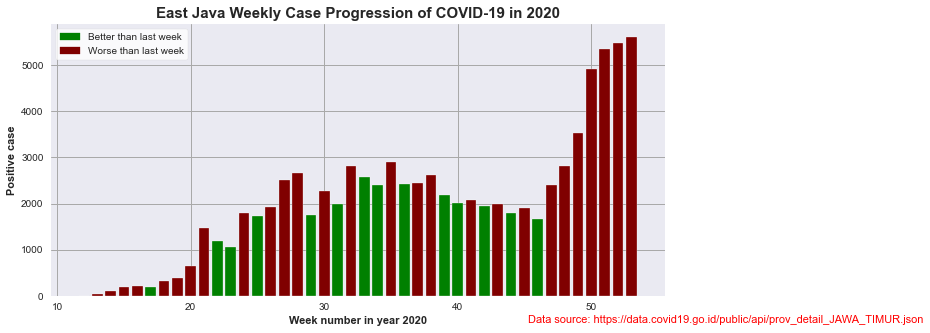

In [28]:
# Visualize weekly case progress in 2020
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (11,5))
axs.bar(data = east_java_week_2020, x=  'minggu_ke-', height = 'akumulasi_positif',
       color = ['green' if i is True else 'maroon' for i in east_java_week_2020['lebih_baik_dari_minggu_lalu']])
axs.set_title('East Java Weekly Case Progression of COVID-19 in 2020', fontsize = 15, weight = 'bold')
axs.set_xlabel('Week number in year 2020', fontsize = 11, weight = 'bold')
axs.set_ylabel('Positive case', fontsize = 11, weight = 'bold')
color = {'Better than last week':'green', 'Worse than last week':'maroon'}
labels = list(color.keys())
handles = [plt.Rectangle((0,0), 1, 1, color = color[label]) for label in labels]
plt.legend(handles, labels, frameon = True, facecolor = 'white')
axs.grid(axis = 'both', color = 'darkgray')
axs.text(1.1, -0.1, 'Data source: https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json',
        transform = axs.transAxes, ha = 'center', color = 'red', fontsize = 11)
plt.savefig('East_Java_weekly_case_2020.png')
plt.show()

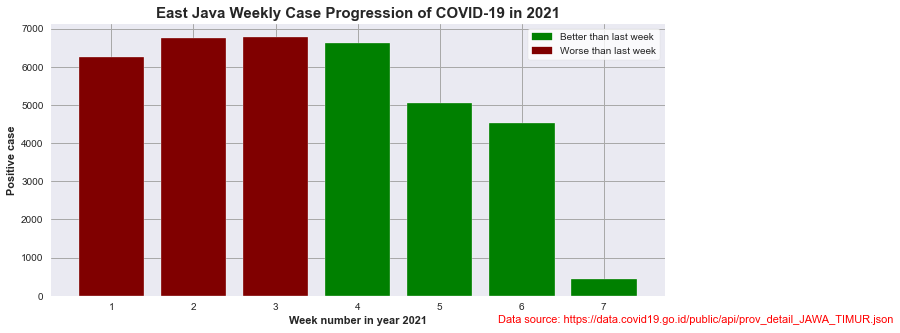

In [29]:
# Visualize weekly case progress in 2021
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (11,5))
axs.bar(data = east_java_week_2021, x = 'minggu_ke-', height = 'akumulasi_positif',
       color = ['green' if x is True else 'maroon' for x in east_java_week_2021['lebih_baik_dari_minggu_lalu']])
axs.set_title('East Java Weekly Case Progression of COVID-19 in 2021', fontsize = 15, weight = 'bold')
axs.set_xlabel('Week number in year 2021', fontsize = 11, weight = 'bold')
axs.set_ylabel('Positive case', fontsize = 11, weight = 'bold')
axs.text(1.05,-0.1,'Data source: https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json',
        transform = axs.transAxes, color = 'red', fontsize = 11, ha = 'center')
axs.grid(axis = 'both', color = 'darkgray')
plt.legend(handles, labels, frameon = True, facecolor = 'white')
plt.savefig('East_Java_weekly_case_2021.png')
plt.show()

Year 2020 was the worst year for East Java in term of disease control. Accumulated active case on each week tended to increase, signed by there are more red bars than the green one. With this fact, COVID-19 spread is almost uncontrollable for 53 weeks in 2020 and this also indicated occupancy of hospital kept declining due to more patients needed to be treated in the hospital. On the other hand, East Java local goverments have learned from their mistakes in COVID-19 control. Marked by increase in recovered patients from November 2020 to late February 2021, in 4th week to 7th week the active case kept declining.

## 5) Compare National COVID-19 Case with East Java

Head-to-head comparison needed in this analysis to see why death rate in East Java is higher than Indonesia. This will make analysis easier to interpret. However, the values range between East Java and Indonesia COVID-19 data makes the direct analysis is impossible to be done. Value transformation is needed to normalize those values in each COVID-19 data, following this formula:

$$ transformation = \frac{x - min\,value\,in\,column}{max\,value\,in\,column - min\,value\,in\,column} $$

Other problem is the start date when first case is reported is different in East Java and Indonesia, inner join method will be used make new dataframe that the date is matched between East Java data and Indonesia data.

In [33]:
comparison = pd.merge(left = east_java_daily, right = indo_daily, left_on = 'tanggal', right_on = 'tanggal', how = 'inner')
daily_comparison = comparison[['tanggal','positif','jumlah_positif']]

In [56]:
# Value transformation on daily_comparison dataframe
daily_comparison['positif_jatim'] = daily_comparison['positif'].apply(lambda x: (x-daily_comparison['positif']
                                                                                 .min())/(daily_comparison['positif'].max()-
                                                                                          daily_comparison['positif'].min()))
daily_comparison['positif_indo'] = daily_comparison['jumlah_positif'].apply(lambda x: (x-daily_comparison['jumlah_positif']
                                                                                 .min())/(daily_comparison['jumlah_positif'].max()-
                                                                                          daily_comparison['jumlah_positif'].min()))
daily_comparison['akumulasi_positif_jatim'] = daily_comparison['positif'].cumsum()
daily_comparison['akumulasi_positif_indo'] = daily_comparison['jumlah_positif'].cumsum()
print(daily_comparison.head(),'\n')

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

     tanggal  positif  jumlah_positif  akumulasi_positif_jatim  \
0 2020-03-18        2              55                        2   
1 2020-03-19        0              82                        2   
2 2020-03-20        0              60                        2   
3 2020-03-21        0              81                        2   
4 2020-03-22        0              64                        2   

   akumulasi_positif_indo  positif_jatim  positif_indo  trans_akumulasi_jatim  \
0                      55       0.001669      0.000000                    0.0   
1                     137       0.000000      0.001867                    0.0   
2                     197       0.000000      0.000346                    0.0   
3                     278       0.000000      0.001798                    0.0   
4                     342       0.000000      0.000622                    0.0   

   trans_akumulasi_indo  
0              0.000000  
1              0.000067  
2              0.000116  
3           

In [57]:
daily_comparison['trans_akumulasi_jatim'] = (daily_comparison['akumulasi_positif_jatim'].
                                       apply(lambda x: (x-daily_comparison['akumulasi_positif_jatim'].min())/
                                            (daily_comparison['akumulasi_positif_jatim'].max()-
                                            daily_comparison['akumulasi_positif_jatim'].min())))

daily_comparison['trans_akumulasi_indo'] = (daily_comparison['akumulasi_positif_indo'].
                                       apply(lambda x: (x-daily_comparison['akumulasi_positif_indo'].min())/
                                            (daily_comparison['akumulasi_positif_indo'].max()-
                                            daily_comparison['akumulasi_positif_indo'].min())))

print(daily_comparison.tail())

       tanggal  positif  jumlah_positif  akumulasi_positif_jatim  \
330 2021-02-11     1044            8435                   120474   
331 2021-02-12      776            9869                   121250   
332 2021-02-13      560            8844                   121810   
333 2021-02-14      516            6765                   122326   
334 2021-02-15      432            6462                   122758   

     akumulasi_positif_indo  positif_jatim  positif_indo  \
330                 1191818       0.871452      0.579410   
331                 1201687       0.647746      0.678559   
332                 1210531       0.467446      0.607689   
333                 1217296       0.430718      0.463942   
334                 1223758       0.360601      0.442992   

     trans_akumulasi_jatim  trans_akumulasi_indo  
330               0.981394              0.973899  
331               0.987715              0.981964  
332               0.992277              0.989191  
333               0.996481

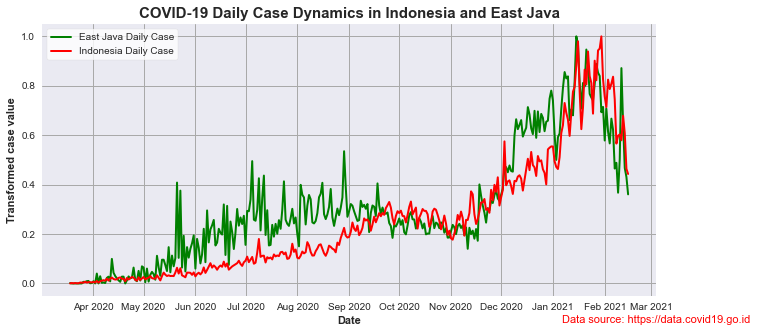

In [49]:
# Plot data from daily_comparison to see dynamics of COVID-19 daily case
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (11,5))
dc = ['positif_jatim','positif_indo']
colours = ['green','red']
for col, colp in zip(dc, colours):
    axs.plot(daily_comparison['tanggal'], daily_comparison[col], color = colp, linewidth = 2, label = col)
axs.set_title('COVID-19 Daily Case Dynamics in Indonesia and East Java', fontsize = 15, weight = 'bold')
axs.set_xlabel('Date', fontsize = 11, weight = 'bold')
axs.set_ylabel('Transformed case value', fontsize = 11, weight = 'bold')
axs.xaxis.set_major_locator(mdates.MonthLocator())
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs.grid(axis = 'both', color = 'darkgray')
plt.legend(['East Java Daily Case', 'Indonesia Daily Case'], frameon = True, facecolor = 'white')
axs.text(1, -0.1, 'Data source: https://data.covid19.go.id',
        transform = axs.transAxes, color = 'red', fontsize = 11, ha = 'center')
plt.savefig('Daily_case_dynamics.png')
plt.show()

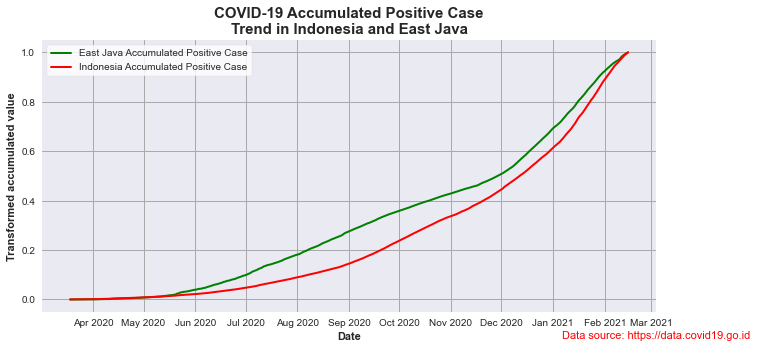

In [50]:
# Plot data from daily_comparison to see trend of COVID-19 accumulated case
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (11,5))
acc = ['trans_akumulasi_jatim', 'trans_akumulasi_indo']
col = ['green','red']
for a, c in zip(acc, col):
    axs.plot(daily_comparison['tanggal'], daily_comparison[a], color = c, linewidth = 2, label = a)
axs.set_title('COVID-19 Accumulated Positive Case\nTrend in Indonesia and East Java', fontsize = 15, weight = 'bold')
axs.set_xlabel('Date', fontsize = 11, weight = 'bold')
axs.set_ylabel('Transformed accumulated value', fontsize = 11, weight = 'bold')
axs.xaxis.set_major_locator(mdates.MonthLocator())
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs.grid(axis = 'both', color = 'darkgray')
plt.legend(['East Java Accumulated Positive Case', 'Indonesia Accumulated Positive Case'],
          frameon = True, facecolor = 'white')
axs.text(1,-0.1,'Data source: https://data.covid19.go.id',
        transform = axs.transAxes, color = 'red', fontsize = 11, ha = 'center')
plt.savefig('Accumulated_case_trend.png')
plt.show()

Overall, East Java has higher values in reported daily case and accumulated positive than the national COVID-19 reported daily case and accumulated. With increase in positivity case, it is possible that reported death case will also increase.

In [52]:
# Reported deaths data visualization
death_comparison = comparison[['tanggal','meninggal','jumlah_meninggal']]

In [58]:
# Transform data values
death_comparison['trans_meninggal_jatim'] = death_comparison['meninggal'].apply(lambda x:(x-death_comparison['meninggal'].min())/
                                                                               (death_comparison['meninggal'].max()-
                                                                               death_comparison['meninggal'].min()))

death_comparison['trans_meninggal_indo'] = death_comparison['jumlah_meninggal'].apply(lambda x:(x-death_comparison['jumlah_meninggal'].min())/
                                                                               (death_comparison['jumlah_meninggal'].max()-
                                                                               death_comparison['jumlah_meninggal'].min()))

In [59]:
# Calculate accumulated reported deaths
death_comparison['akumulasi_jatim_meninggal'] = death_comparison['meninggal'].cumsum()

death_comparison['akumulasi_indo_meninggal'] = death_comparison['jumlah_meninggal'].cumsum()

# Transform data values
death_comparison['trans_akumulasi_meninggal_jatim'] = death_comparison['akumulasi_jatim_meninggal'].apply(lambda x:(x-death_comparison['akumulasi_jatim_meninggal'].min())/
                                                                               (death_comparison['akumulasi_jatim_meninggal'].max()-
                                                                               death_comparison['akumulasi_jatim_meninggal'].min()))

death_comparison['trans_akumulasi_meninggal_indo'] = death_comparison['akumulasi_indo_meninggal'].apply(lambda x:(x-death_comparison['akumulasi_indo_meninggal'].min())/
                                                                               (death_comparison['akumulasi_indo_meninggal'].max()-
                                                                               death_comparison['akumulasi_indo_meninggal'].min()))

In [60]:
print(death_comparison.tail())

       tanggal  meninggal  jumlah_meninggal  trans_meninggal_jatim  \
330 2021-02-11         27               214               0.303371   
331 2021-02-12         75               275               0.842697   
332 2021-02-13         19               280               0.213483   
333 2021-02-14         23               247               0.258427   
334 2021-02-15         17               184               0.191011   

     trans_meninggal_indo  akumulasi_jatim_meninggal  \
330              0.448421                       8060   
331              0.576842                       8135   
332              0.587368                       8154   
333              0.517895                       8177   
334              0.385263                       8194   

     akumulasi_indo_meninggal  trans_akumulasi_meninggal_jatim  \
330                     32376                         0.983647   
331                     32651                         0.992800   
332                     32931               

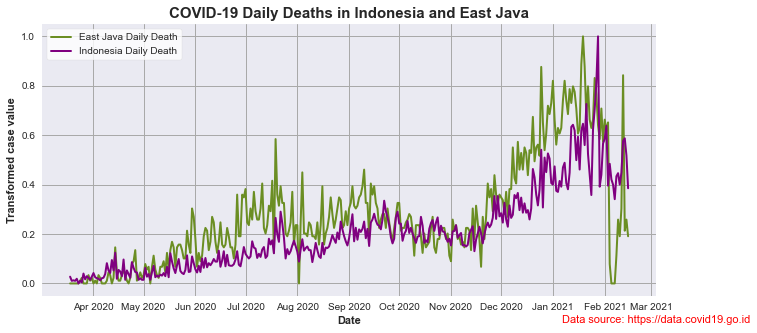

In [76]:
# Visualize daily death cases from COVID-19 in Indonesia and East Java
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (11,5))
daily_death = ['trans_meninggal_jatim', 'trans_meninggal_indo']
death_color = ['olivedrab', 'purple']
for dd, dc in zip(daily_death, death_color):
    axs.plot(death_comparison['tanggal'], death_comparison[dd], color = dc, linewidth = 2, label = dd)
axs.set_title('COVID-19 Daily Deaths in Indonesia and East Java', fontsize = 15, weight = 'bold')
axs.set_xlabel('Date', fontsize = 11, weight = 'bold')
axs.set_ylabel('Transformed case value', fontsize = 11, weight = 'bold')
axs.xaxis.set_major_locator(mdates.MonthLocator())
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs.grid(axis = 'both', color = 'darkgray')
plt.legend(['East Java Daily Death', 'Indonesia Daily Death'], frameon = True, facecolor = 'white')
axs.text(1, -0.1, 'Data source: https://data.covid19.go.id',
        transform = axs.transAxes, color = 'red', fontsize = 11, ha = 'center')
plt.savefig('Daily_deaths_dynamics.png')
plt.show()

In East Java, there are some days that had 0 reported deaths on 2 August 2020 and 5 - 7 February 2021. However, daily death case from COVID-19 is overall higher than death case in Indonesia.

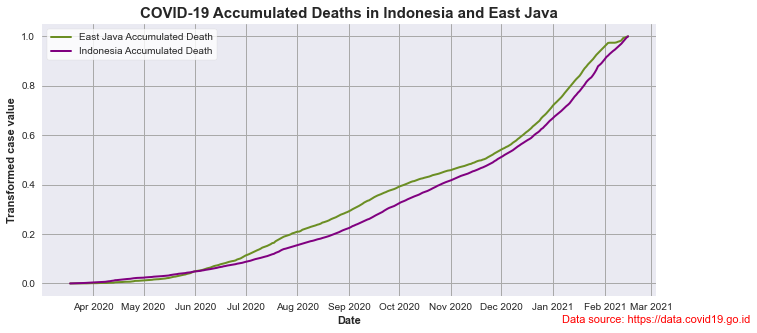

In [77]:
# Visualize accumulated deaths trend
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (11,5))
acc_dead = ['trans_akumulasi_meninggal_jatim','trans_akumulasi_meninggal_indo']
for acc, col in zip(acc_dead, death_color):
    axs.plot(death_comparison['tanggal'], death_comparison[acc], color = col, linewidth = 2, label = acc)
axs.set_title('COVID-19 Accumulated Deaths in Indonesia and East Java', fontsize = 15, weight = 'bold')
axs.set_xlabel('Date', fontsize = 11, weight = 'bold')
axs.set_ylabel('Transformed case value', fontsize = 11, weight = 'bold')
axs.xaxis.set_major_locator(mdates.MonthLocator())
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axs.grid(axis = 'both', color = 'darkgray')
plt.legend(['East Java Accumulated Death', 'Indonesia Accumulated Death'], frameon = True, facecolor = 'white')
axs.text(1, -0.1, 'Data source: https://data.covid19.go.id',
        transform = axs.transAxes, color = 'red', fontsize = 11, ha = 'center')
plt.savefig('Accumulated_deaths_trend.png')
plt.show()

Accumulated deaths from COVID-19 also have same trend with accumulated daily case of COVID-19, there is linear relation between the reported deaths and the daily case. It can be concluded that the higher reported daily case goes, the higher reported deaths recorded. This certainly plays major part in why death rate in East Java is higher than death rate in Indonesia.

As a conclusion in this project, there are two reasons why death rate in East Java is higher than the national death rate:

1) Reported positive case in East Java is higher than Indonesia, the chance of reported deaths will be higher if reported daily case keeps increasing every day.

2) On average, accumulated deaths from COVID-19 is higher than Indonesia. Even if there are some days that had 0 reported deaths, the trend of data still shows daily reported deaths is higher than deaths from COVID-19 in Indonesia.